# PROJECT: MACHINE LEARNNG
## Semi-supervised Learning

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

In [93]:
# digits.images
digits = load_digits()
features = digits.feature_names
X = pd.DataFrame(data=digits.data, columns=features)
y = digits.target
X


,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_train, X_test, y_train, y_test = train_test_split(
    scaler.fit_transform(X), y, test_size=0.2, random_state=5
)






In [6]:
X_train = pd.DataFrame(X_train)
X_train


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.000,0.6250,0.9375,0.4375,0.0000,0.00,0.0,0.0,0.2500,...,0.0000,0.000000,0.0,0.111111,0.7500,0.9375,0.7500,0.1875,0.0000,0.0000
1,0.0,0.000,0.4375,0.7500,0.8125,0.1250,0.00,0.0,0.0,0.0000,...,0.0625,0.000000,0.0,0.000000,0.3750,0.8750,0.8750,0.2500,0.0000,0.0000
2,0.0,0.000,0.4375,0.8750,0.5000,0.2500,0.00,0.0,0.0,0.0000,...,0.0000,0.000000,0.0,0.000000,0.3750,0.8125,0.4375,0.0000,0.0000,0.0000
3,0.0,0.125,0.5000,0.7500,0.9375,0.8750,0.25,0.0,0.0,0.1875,...,0.0000,0.000000,0.0,0.000000,0.8750,0.9375,0.6875,0.1250,0.0000,0.0000
4,0.0,0.375,1.0000,0.9375,0.3750,0.0000,0.00,0.0,0.0,0.3125,...,0.3125,0.000000,0.0,0.444444,1.0000,1.0000,1.0000,0.8750,0.1875,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1432,0.0,0.000,0.3125,1.0000,0.9375,0.1875,0.00,0.0,0.0,0.0000,...,0.8125,0.230769,0.0,0.000000,0.3125,0.1250,0.5625,1.0000,0.8750,0.1875
1433,0.0,0.000,0.0000,0.0625,0.9375,0.1875,0.00,0.0,0.0,0.0000,...,0.0000,0.000000,0.0,0.000000,0.0000,0.1250,1.0000,0.3750,0.0000,0.0000
1434,0.0,0.000,0.0625,0.8125,0.5625,0.0000,0.00,0.0,0.0,0.0000,...,0.5000,0.000000,0.0,0.000000,0.1250,0.8750,0.9375,0.3750,0.0000,0.0000
1435,0.0,0.000,0.6250,0.8125,0.0000,0.0000,0.00,0.0,0.0,0.0000,...,0.0000,0.000000,0.0,0.000000,0.6875,1.0000,0.8125,0.0625,0.0000,0.0000


In [7]:
y_train = pd.DataFrame(y_train)
y_train

,0
0,9
1,0
2,0
3,3
4,2
...,...
1432,2
1433,4
1434,6
1435,8


## Train the baseline model (SVM) supervised with labels 

For linear SVM the cost function to address is:


$$
\underset{\theta}{\text{min}} \, \sum_{n=1}^{n} \theta_j^2 = 
\underset{\theta}{\text{min}} \, \| \theta\|^2
$$
such that:

$$
\theta^Tx +b  \geq 1 \qquad if \qquad y_i = 1
$$
$$
\theta^Tx +b \leq -1 \qquad if \qquad y_i = -1
$$ 

If the sample is not exactly linearly separable (but can still be addressed as a linear problem) we add to the objective function the parameter $C>0$ to weight the error: 

$$
\underset{\theta}{\text{min}} \, \| \theta\|^2 + C\sum_{i}^{m} \xi_i
$$
Such that:

$$
 y_i (\theta^Tx +b)    \geq 1 -  \xi_i
$$
So:
$$
  \xi_i = max \left[0, 1- y_i (\theta^Tx_i +b)  \right]
$$





- C is a regularization parameter:

  - large C makes constraints hard to ignore → narrow margin
  - small C allows constraints to be easily ignored →  large margin



In the Dual problem formulation applying the Lagrangian multipliers :


$$
\underset{\lambda}{\text{max}} \, \sum_{n=1}^{m} \lambda_i -\frac{1}{2}  \sum_{i=1}^{m} \sum_{j=1}^{m} \lambda_i \lambda_j y_i y_j x^T_i x_j
$$
Such that
$$
\sum_{n=1}^{m} \lambda_i y_i = 0
$$
$$
0\leq \lambda \leq C
$$

### Kernel trick

In the gaussian kernel formulation of the problem the original features are replaced through a similarity function:

$$
 similarity(x,l) = f^{(i)} = exp\left( - \frac{\sum_{m=1}^{m} \|x-l_i\|^2}{2\sigma^2} \right)
$$
Where:
$$
f_1^{(i)} = similarity(x_i, l^1)
$$
$$
f_2^{(i)} = similarity(x_i, l^2)
$$
$$
...
$$
$$
f_m^{(i)} = similarity(x_i, l^m)
$$
so:
$$
f^{(i)}=
\begin{bmatrix}
f_1^{(i)} \\
f_2^{(i)} \\
...\\
f_m^{(i)} \\
\end{bmatrix}
$$

for example is predicted "$y=1$" if  $ \, \theta^Tf \geq 0$

The cost function becomes for $y =(0,1)$:

$$
\underset{\theta}{\text{min}} \, C \sum_{n=1}^{m} \left( y_i \, cost_1 \,(\theta^Tf^{(i)}) + (1-y_i) \, cost_0 \, (\theta^Tf^{(i)})  \right) + \frac{1}{2}  
\sum_{n=1}^{n} \theta_j^2
$$

Parameters C and $\sigma^2$ control the bias-variance tradeoff:

- Hyperparameter C: 
  - Large: Lower bias, high variance.
  - Small: high bias, Lower variance.
- Hyperparameter $\sigma^2$: 
  - Large: high bias, Lower variance.
  - Small: Lower bias, high variance.


In [61]:
def FullModel(X, y):
    estimator_SVM = SVC(probability=True)

    parameters_SVM = {
        "C": [0.5, 1, 3, 5, 11, 20],
        "gamma": (0.1, 10.0, 1.0, 3),
        "kernel": ("linear", "rbf"),
    }

    # with GridSearch
    grid_search_SVM = GridSearchCV(
        estimator=estimator_SVM,
        param_grid=parameters_SVM,
        scoring="accuracy",
        n_jobs=-1,
        return_train_score=True,
        cv=5,
        verbose=3,
    )
    # fit the SVM model

    Full_model = grid_search_SVM.fit(X, y)

    # predicting on training and test data-set
    Y_pred = Full_model.predict(X)

    # Assess the performance
    print("SVM : ")
    print(grid_search_SVM.best_params_)
    print("Averange Accuracy Scores - SVM:", metrics.accuracy_score(y, Y_pred))
    print("Confusion matrix - SVM: \n", confusion_matrix(y, Y_pred))
    return Full_model


FullModel = FullModel(
    X_train,
    y_train,
)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
SVM : 
{'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}
Averange Accuracy Scores - SVM: 0.9972164231036882
Confusion matrix - SVM: 
 [[143   0   0   0   0   0   0   0   0   0]
 [  0 147   0   0   0   0   0   0   0   0]
 [  0   0 141   0   0   0   0   0   0   0]
 [  0   0   0 146   0   0   0   0   0   0]
 [  0   0   0   0 149   0   0   0   0   0]
 [  0   0   0   0   0 135   0   0   0   1]
 [  0   0   0   0   0   0 151   0   0   0]
 [  0   0   0   0   0   0   0 137   0   0]
 [  0   1   0   0   0   0   0   0 135   0]
 [  0   0   0   0   0   0   0   1   1 149]]


#### Evaluate the model on the test set

In [6]:
def TestFull(X, y, model):
    model.score(X, y)
    Y_pred = model.predict(X)

    # Assess the performance
    print("SVM : ")
    print(model.best_params_)
    print("Averange Accuracy Scores - SVM:", metrics.accuracy_score(y, Y_pred))
    # print("Precision score - SVM: ", precision_score(y, Y_pred))
    # print("Recall score - SVM: ", recall_score(y, Y_pred))
    # print("F1 score - SVM: ", f1_score(y, Y_pred))
    print("Confusion matrix - SVM: \n", confusion_matrix(y, Y_pred))
    # tn, fp, fn, tp = confusion_matrix(y, Y_pred).ravel()
    # print("tn = ", tn, "fp = ", fp, "fn = ", fn, "tp = ", tp)


TestFull(X_test, y_test, FullModel)

SVM : 
{'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}
Averange Accuracy Scores - SVM: 0.9833333333333333
Confusion matrix - SVM: 
 [[35  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  1 35  0  1  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  1]
 [ 0  1  0  0  0  0  0  0 37  0]
 [ 0  0  0  0  0  1  0  0  0 28]]


## Propagate labels through Kmeans clustering 

Kmeans algorithm is ran to identify the centroids of 50 different group in the dataset, then the real lebels of such groups is propagated to all the elements of each group.

The cost function of K-means is given by:
$$
J(c^{(1)},... c^{(m)}, \mu_1,...,\mu_K) =  \frac{1}{m} \sum_{i=1}^{m}  ||x^{(i)}-\mu_{c^{(i)}}||^2
$$

Where:

- $c^{(1)}$ = index of the cluster (1,2,...,K) to which example $x^{(i)}$ is currently assigned
- $\mu_k$ = cluster centroid $k$
- $\mu_{c^{(i)}}$ = cluster centrois of cluster to which exampe $x^{(i)}$ has been assigned

In [7]:
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train) # matrix of distances from centroids
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

y_representative_digits = y_train[representative_digit_idx]
y_representative_digits

# propagating the labels thoughout the whole dataset

y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]


In [76]:

# percentage of correctly labelled items
sum(y_train_propagated==y_train)/len(y_train)
#pd.DataFrame(X_digits_dist)
#representative_digit_idx


0.9505915100904663

9
[0.         0.         0.1875     0.875      1.         0.5
 0.         0.         0.         0.1875     0.9375     0.5
 0.25       0.9375     0.0625     0.         0.         0.5
 0.625      0.         0.1875     1.         0.5        0.
 0.         0.2        0.9375     0.8125     1.         0.875
 0.06666667 0.         0.         0.         0.125      0.3125
 1.         0.25       0.         0.         0.         0.
 0.         0.5        0.6875     0.         0.         0.
 0.         0.         0.         0.9375     0.125      0.
 0.         0.         0.         0.         0.125      0.8125
 0.         0.         0.         0.        ]


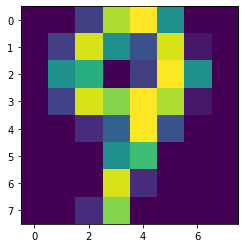

9
[0.         0.         0.3125     0.8125     0.875      0.3125
 0.         0.         0.         0.125      0.9375     0.375
 0.6875     0.9375     0.0625     0.         0.         0.0625
 1.         0.3125     0.5        1.         0.25       0.
 0.         0.         0.25       0.75       0.5625     0.8125
 0.53333333 0.         0.         0.         0.         0.
 0.         0.5        0.57142857 0.         0.         0.
 0.         0.         0.         0.6875     0.4375     0.
 0.         0.         0.4375     0.4375     0.3125     0.9375
 0.125      0.         0.         0.         0.3125     0.9375
 1.         0.4375     0.         0.        ]


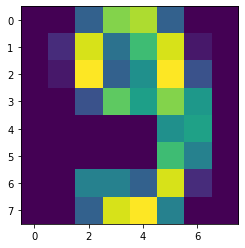

0
[0.         0.         0.0625     0.8125     0.9375     0.5
 0.         0.         0.         0.         0.6875     0.875
 0.5        0.9375     0.         0.         0.         0.125
 1.         0.1875     0.         0.8125     0.125      0.
 0.         0.33333333 0.9375     0.         0.         0.625
 0.33333333 0.         0.         0.21428571 0.625      0.
 0.         0.625      0.35714286 0.         0.         0.1875
 0.8125     0.         0.0625     0.9375     0.1875     0.
 0.         0.         0.75       0.625      0.6875     0.6875
 0.         0.         0.         0.         0.0625     0.75
 0.6875     0.25       0.         0.        ]


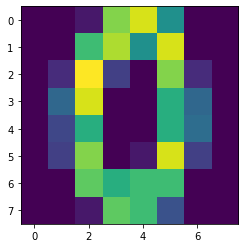

6
[0.         0.         0.         0.375      0.875      0.0625
 0.         0.         0.         0.         0.125      1.
 0.625      0.         0.         0.         0.         0.
 0.6875     0.9375     0.125      0.         0.         0.
 0.         0.         0.8125     0.8125     0.5        0.3125
 0.         0.         0.         0.14285714 1.         0.875
 0.75       1.         0.21428571 0.         0.         0.0625
 1.         0.6875     0.         0.3125     0.75       0.
 0.         0.         0.6875     0.9375     0.3125     0.75
 0.75       0.         0.         0.         0.         0.5625
 0.9375     0.875      0.375      0.        ]


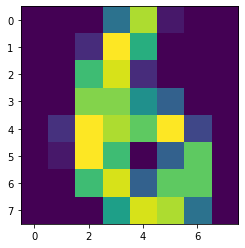

2
[0.     0.     0.4375 1.     1.     0.1875 0.     0.     0.     0.4375
 1.     0.5625 0.875  0.4375 0.     0.     0.     0.625  0.5625 0.
 0.875  0.3125 0.     0.     0.     0.2    0.1875 0.25   1.     0.125
 0.     0.     0.     0.     0.     0.75   0.6875 0.     0.     0.
 0.     0.     0.375  1.     0.1875 0.     0.     0.     0.     0.
 0.75   0.9375 0.5    0.5    0.1875 0.     0.     0.     0.625  1.
 1.     1.     0.5625 0.    ]


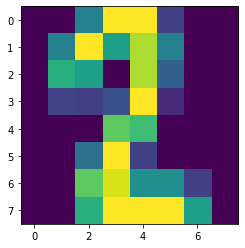

7
[0.         0.         0.1875     0.75       1.         0.625
 0.         0.         0.         0.125      0.875      0.75
 0.75       0.75       0.         0.         0.         0.3125
 0.625      0.         0.625      0.6875     0.         0.
 0.         0.         0.         0.0625     0.875      0.5625
 0.13333333 0.         0.         0.         0.5        1.
 1.         1.         0.71428571 0.         0.         0.
 0.375      1.         0.8125     0.4375     0.         0.
 0.         0.         0.         1.         0.3125     0.
 0.         0.         0.         0.         0.3125     0.8125
 0.         0.         0.         0.        ]


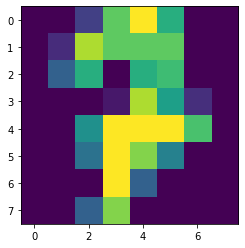

1
[0.     0.     0.375  1.     0.6875 0.     0.     0.     0.     0.
 0.5625 1.     1.     0.3125 0.     0.     0.     0.     0.5    1.
 1.     0.25   0.     0.     0.     0.     0.625  1.     0.8125 0.
 0.     0.     0.     0.     0.8125 1.     0.75   0.     0.     0.
 0.     0.     0.625  1.     0.5625 0.     0.     0.     0.     0.
 0.5625 1.     0.625  0.     0.     0.     0.     0.     0.25   0.9375
 1.     0.1875 0.     0.    ]


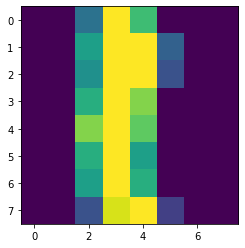

8
[0.     0.     0.25   0.9375 0.8125 0.1875 0.     0.     0.     0.25
 0.8125 0.875  0.625  0.8125 0.     0.     0.     0.5    1.     0.5
 0.5    0.8125 0.     0.     0.     0.     0.9375 0.75   0.9375 0.6875
 0.     0.     0.     0.     0.375  1.     0.8125 0.0625 0.     0.
 0.     0.     0.6875 0.9375 0.9375 0.125  0.     0.     0.     0.
 0.75   0.5    0.9375 0.5    0.     0.     0.     0.     0.3125 0.9375
 1.     0.3125 0.     0.    ]


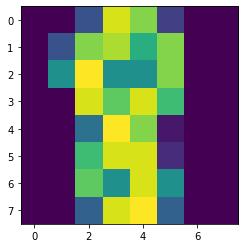

4
[0.         0.         0.         0.8125     0.5625     0.
 0.         0.         0.         0.         0.25       0.9375
 0.1875     0.         0.         0.         0.         0.
 0.6875     0.5625     0.375      0.25       0.         0.
 0.         0.33333333 1.         0.1875     0.8125     0.5
 0.06666667 0.         0.         1.         1.         0.5625
 1.         1.         0.64285714 0.         0.         0.75
 1.         1.         1.         0.6875     0.1875     0.
 0.         0.         0.25       0.75       0.875      0.
 0.         0.         0.         0.         0.         0.75
 0.625      0.         0.         0.        ]


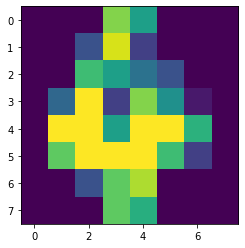

1
[0.         0.         0.         0.         0.75       0.8125
 0.0625     0.         0.         0.         0.         0.5
 1.         0.9375     0.125      0.         0.         0.
 0.625      1.         1.         0.75       0.         0.
 0.         0.26666667 1.         1.         1.         0.8125
 0.         0.         0.         0.28571429 0.4375     0.25
 1.         0.375      0.         0.         0.         0.
 0.         0.0625     1.         0.5        0.         0.
 0.         0.         0.         0.0625     1.         0.5
 0.         0.         0.         0.         0.         0.
 0.75       0.75       0.         0.        ]


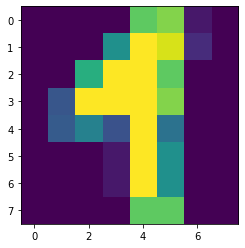

5
[0.         0.         0.5625     1.         1.         1.
 0.625      0.         0.         0.25       1.         0.875
 0.5        0.6875     0.6875     0.         0.         0.6875
 1.         0.4375     0.         0.         0.         0.
 0.         0.33333333 0.9375     1.         0.375      0.
 0.         0.         0.         0.         0.0625     0.875
 0.9375     0.         0.         0.         0.         0.
 0.         0.5        1.         0.         0.         0.
 0.         0.         0.5625     0.8125     0.875      0.
 0.         0.         0.         0.         0.75       1.
 0.4375     0.         0.         0.        ]


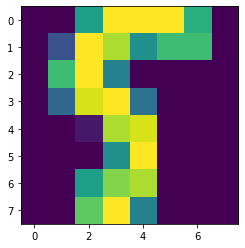

9
[0.         0.125      0.5625     0.9375     0.8125     0.25
 0.         0.         0.         0.5        0.75       0.25
 0.5        0.5        0.         0.         0.         0.5625
 0.6875     0.         0.3125     1.         0.1875     0.
 0.         0.26666667 0.8125     0.5        1.         1.
 0.4        0.         0.         0.         0.25       0.5
 0.125      0.6875     0.64285714 0.         0.         0.
 0.         0.         0.         0.625      0.5        0.
 0.         0.         0.4375     0.         0.1875     0.875
 0.375      0.         0.         0.         0.4375     1.
 0.875      0.5        0.         0.        ]


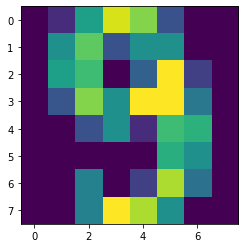

6
[0.         0.         0.         0.5625     1.         0.375
 0.         0.         0.         0.         0.5        1.
 0.75       0.3125     0.         0.         0.         0.125
 1.         0.5625     0.         0.         0.         0.
 0.         0.4        1.         0.375      0.125      0.
 0.         0.         0.         0.57142857 1.         1.
 1.         0.4375     0.         0.         0.         0.125
 1.         0.4375     0.4375     1.         0.25       0.
 0.         0.         0.5625     0.8125     0.1875     0.875
 0.5625     0.         0.         0.         0.         0.5
 1.         1.         0.4375     0.        ]


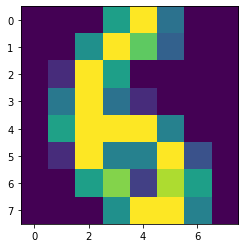

6
[0.         0.         0.0625     0.8125     0.4375     0.
 0.         0.         0.         0.         0.4375     0.875
 0.125      0.         0.         0.         0.         0.
 0.8125     0.3125     0.         0.         0.         0.
 0.         0.         1.         0.1875     0.         0.
 0.         0.         0.         0.21428571 1.         0.625
 0.75       0.75       0.21428571 0.         0.         0.1875
 1.         0.6875     0.3125     0.5625     0.75       0.
 0.         0.0625     0.8125     0.6875     0.25       0.8125
 0.6875     0.         0.         0.         0.0625     0.75
 1.         0.6875     0.125      0.        ]


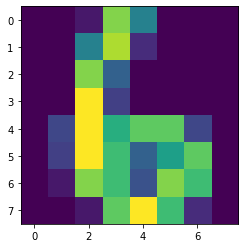

9
[0.         0.         0.         0.0625     0.4375     0.75
 0.875      0.06666667 0.         0.         0.0625     0.8125
 0.5        0.25       0.8125     0.         0.         0.
 0.625      1.         0.5625     0.9375     0.6875     0.
 0.         0.06666667 1.         0.9375     0.9375     1.
 0.2        0.         0.         0.         0.6875     0.5625
 0.1875     0.875      0.         0.         0.         0.
 0.         0.         0.3125     0.5625     0.         0.
 0.         0.         0.         0.         0.4375     0.5
 0.         0.         0.         0.         0.         0.
 0.5        0.375      0.         0.        ]


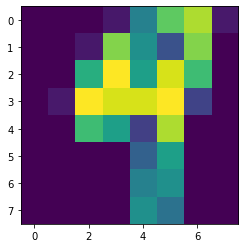

2
[0.     0.     0.6875 1.     0.6875 0.     0.     0.     0.     0.1875
 1.     0.6875 0.9375 0.375  0.     0.     0.     0.0625 0.625  0.1875
 0.625  0.625  0.     0.     0.     0.     0.     0.     0.5625 0.625
 0.     0.     0.     0.     0.     0.     0.75   0.5625 0.     0.
 0.     0.     0.     0.3125 1.     0.3125 0.     0.     0.     0.0625
 0.8125 1.     1.     0.8125 0.5    0.     0.     0.     0.6875 0.6875
 0.5    0.8125 1.     0.4375]


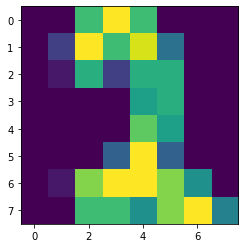

3
[0.         0.         0.25       0.8125     1.         0.6875
 0.         0.         0.         0.5625     1.         0.5625
 0.625      0.9375     0.         0.         0.         0.3125
 0.25       0.         0.75       0.6875     0.         0.
 0.         0.         0.         0.3125     1.         0.75
 0.06666667 0.         0.         0.         0.         0.0625
 0.5625     0.9375     0.57142857 0.         0.         0.
 0.         0.         0.         0.5        0.75       0.
 0.         0.         0.0625     0.375      0.5        1.
 0.5        0.         0.         0.         0.3125     1.
 0.9375     0.5625     0.0625     0.        ]


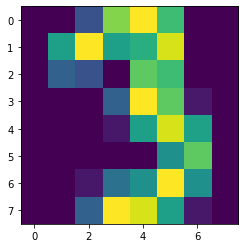

2
[0.         0.25       0.875      1.         0.375      0.
 0.         0.         0.         0.75       0.875      0.75
 0.9375     0.         0.         0.         0.         0.6875
 0.125      0.5        0.75       0.         0.         0.
 0.         0.         0.         0.6875     0.6875     0.
 0.         0.         0.         0.         0.125      1.
 0.25       0.         0.         0.         0.         0.
 0.4375     0.8125     0.         0.         0.         0.
 0.         0.0625     0.875      0.8125     0.5        0.5
 0.4375     0.         0.         0.22222222 0.9375     1.
 1.         0.9375     0.5        0.        ]


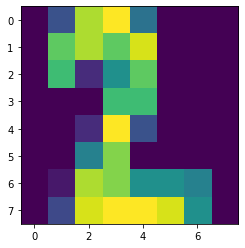

1
[0.         0.         0.625      0.8125     0.0625     0.
 0.         0.         0.         0.         0.4375     1.
 0.3125     0.         0.         0.         0.         0.
 0.375      1.         0.375      0.         0.         0.
 0.         0.         0.375      1.         0.8125     0.
 0.         0.         0.         0.         0.         0.375
 1.         0.125      0.         0.         0.         0.
 0.         0.1875     1.         0.5        0.         0.
 0.         0.         0.4375     0.6875     1.         0.875
 0.5625     0.30769231 0.         0.         0.375      0.9375
 0.8125     0.875      1.         0.9375    ]


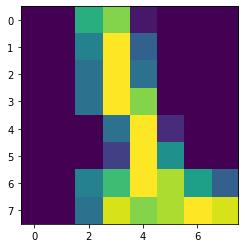

3
[0.     0.     0.5    0.8125 0.75   0.1875 0.     0.     0.     0.375
 0.9375 0.4375 0.5625 0.75   0.     0.     0.     0.     0.     0.
 0.4375 0.6875 0.     0.     0.     0.     0.     0.25   0.9375 0.1875
 0.     0.     0.     0.     0.     0.625  1.     0.5625 0.     0.
 0.     0.     0.     0.     0.25   0.9375 0.4375 0.     0.     0.
 0.6875 0.125  0.0625 0.9375 0.4375 0.     0.     0.     0.5    1.
 1.     0.75   0.     0.    ]


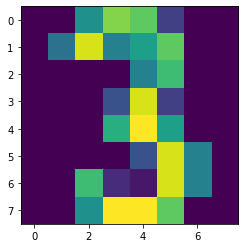

1
[0.     0.     0.375  0.625  0.5    0.1875 0.     0.     0.     0.
 0.375  1.     1.     0.5625 0.     0.     0.     0.     0.5625 1.
 1.     0.375  0.     0.     0.     0.     0.4375 1.     1.     0.625
 0.     0.     0.     0.     0.6875 1.     1.     0.5    0.     0.
 0.     0.     0.4375 1.     1.     0.5625 0.     0.     0.     0.
 0.625  1.     1.     0.375  0.     0.     0.     0.     0.25   0.5625
 0.75   0.6875 0.125  0.    ]


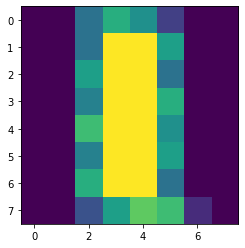

5
[0.         0.         0.5        1.         1.         0.5625
 0.         0.         0.         0.0625     1.         0.9375
 0.6875     0.5        0.         0.         0.         0.0625
 0.875      0.625      0.         0.         0.         0.
 0.         0.46666667 1.         0.625      0.375      0.
 0.         0.         0.         0.14285714 0.75       1.
 1.         0.625      0.         0.         0.         0.
 0.         0.0625     0.4375     0.9375     0.         0.
 0.         0.         0.6875     0.3125     0.8125     0.8125
 0.         0.         0.         0.         0.6875     1.
 1.         0.375      0.         0.        ]


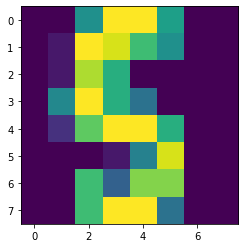

7
[0.         0.         0.0625     0.6875     1.         1.
 0.5        0.         0.         0.         0.3125     0.6875
 0.5625     1.         0.6875     0.         0.         0.
 0.         0.         0.125      1.         0.375      0.
 0.         0.         0.375      0.5625     0.75       1.
 0.6        0.         0.         0.07142857 1.         1.
 1.         0.875      0.21428571 0.         0.         0.
 0.1875     0.3125     1.         0.4375     0.         0.
 0.         0.         0.         0.5        0.875      0.
 0.         0.         0.         0.         0.0625     1.
 0.3125     0.         0.         0.        ]


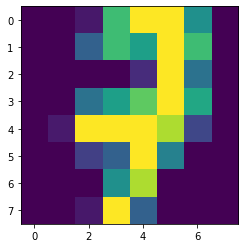

9
[0.         0.         0.3125     0.8125     0.9375     0.375
 0.         0.         0.         0.125      1.         0.5625
 1.         0.8125     0.         0.         0.         0.25
 0.875      0.         0.625      1.         0.125      0.
 0.         0.26666667 0.9375     0.6875     0.9375     1.
 0.06666667 0.         0.         0.         0.4375     0.625
 0.1875     0.8125     0.57142857 0.         0.         0.
 0.1875     0.         0.         0.75       0.3125     0.
 0.         0.         0.8125     0.6875     0.25       1.
 0.25       0.         0.         0.         0.4375     0.875
 1.         0.6875     0.0625     0.        ]


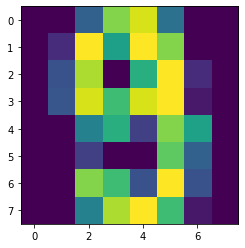

0
[0.         0.         0.375      0.875      0.8125     0.1875
 0.         0.         0.         0.         0.875      0.625
 0.4375     0.8125     0.         0.         0.         0.25
 0.8125     0.         0.         0.75       0.1875     0.
 0.         0.33333333 0.6875     0.         0.         0.4375
 0.4        0.         0.         0.28571429 0.6875     0.
 0.         0.25       0.57142857 0.         0.         0.125
 0.75       0.         0.         0.375      0.375      0.
 0.         0.         0.75       0.5        0.125      0.875
 0.125      0.         0.         0.         0.25       0.9375
 1.         0.5625     0.         0.        ]


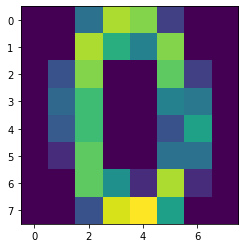

2
[0.         0.25       0.9375     0.8125     0.0625     0.
 0.         0.         0.         0.8125     0.75       0.875
 0.4375     0.         0.         0.         0.         0.5
 0.375      0.375      0.8125     0.         0.         0.
 0.         0.         0.         0.3125     0.9375     0.
 0.         0.         0.         0.         0.         0.6875
 0.625      0.         0.         0.         0.         0.
 0.125      1.         0.3125     0.         0.         0.
 0.         0.         0.6875     1.         0.8125     0.875
 0.75       0.         0.         0.33333333 1.         0.875
 0.5        0.5        0.4375     0.        ]


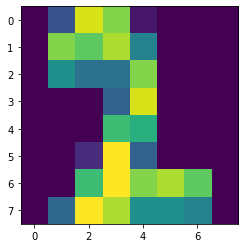

7
[0.         0.         0.375      0.875      1.         0.8125
 0.         0.         0.         0.         0.5625     0.5625
 0.5625     0.9375     0.         0.         0.         0.
 0.         0.         0.875      0.5625     0.         0.
 0.         0.         0.125      0.625      1.         1.
 0.8        0.         0.         0.         0.8125     1.
 0.75       0.4375     0.21428571 0.         0.         0.
 0.1875     0.875      0.375      0.         0.         0.
 0.         0.         0.375      1.         0.125      0.
 0.         0.         0.         0.         0.625      0.8125
 0.         0.         0.         0.        ]


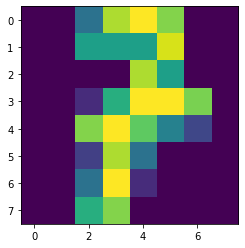

4
[0.         0.         0.         0.5625     0.8125     0.
 0.         0.         0.         0.         0.125      1.
 0.5        0.         0.4375     0.08333333 0.         0.
 0.625      0.8125     0.0625     0.375      1.         0.625
 0.         0.4        1.         0.6875     0.5        0.875
 1.         0.         0.         0.92857143 1.         1.
 1.         1.         0.64285714 0.         0.         0.125
 0.125      0.         0.6875     1.         0.0625     0.
 0.         0.         0.         0.25       1.         0.4375
 0.         0.         0.         0.         0.         0.5625
 0.9375     0.125      0.         0.        ]


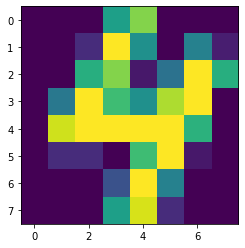

3
[0.         0.125      0.625      1.         1.         0.6875
 0.         0.         0.         0.3125     0.625      0.5
 0.75       1.         0.25       0.         0.         0.
 0.         0.0625     0.625      0.875      0.         0.
 0.         0.         0.         0.375      1.         0.25
 0.         0.         0.         0.         0.         0.4375
 1.         0.3125     0.         0.         0.         0.
 0.         0.0625     0.75       1.         0.25       0.
 0.         0.         0.125      0.25       0.5625     1.
 0.25       0.         0.         0.11111111 0.9375     0.875
 0.6875     0.25       0.         0.        ]


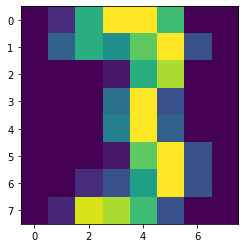

5
[0.         0.125      0.625      0.75       0.75       0.6875
 0.         0.         0.         0.4375     0.875      0.5
 0.5        0.375      0.         0.         0.         0.4375
 0.6875     0.4375     0.1875     0.         0.         0.
 0.         0.53333333 1.         0.8125     0.8125     0.5
 0.         0.         0.         0.07142857 0.1875     0.
 0.0625     0.875      0.35714286 0.         0.         0.
 0.         0.         0.         0.25       0.75       0.
 0.         0.         0.6875     0.1875     0.         0.625
 0.75       0.         0.         0.         0.625      1.
 1.         0.875      0.25       0.        ]


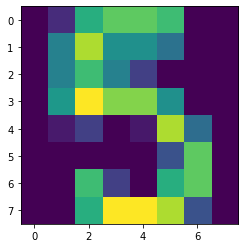

0
[0.         0.         0.125      0.875      0.8125     0.
 0.         0.         0.         0.         0.625      0.9375
 0.9375     0.5        0.         0.         0.         0.125
 1.         0.4375     0.25       0.9375     0.         0.
 0.         0.26666667 1.         0.25       0.         0.8125
 0.46666667 0.         0.         0.28571429 1.         0.0625
 0.         0.625      0.57142857 0.         0.         0.25
 1.         0.3125     0.0625     0.75       0.6875     0.
 0.         0.0625     0.9375     0.875      0.8125     1.
 0.1875     0.         0.         0.         0.1875     0.75
 0.8125     0.3125     0.         0.        ]


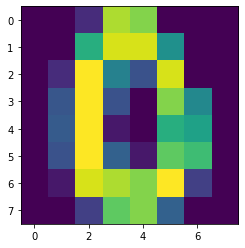

1
[0.         0.         0.         0.         0.3125     0.9375
 0.1875     0.         0.         0.         0.         0.1875
 0.9375     1.         0.25       0.         0.         0.1875
 0.8125     1.         0.875      1.         0.0625     0.
 0.         0.13333333 0.4375     0.25       0.5        1.
 0.         0.         0.         0.         0.         0.
 0.5        0.875      0.         0.         0.         0.
 0.         0.         0.4375     1.         0.0625     0.
 0.         0.         0.         0.         0.5625     1.
 0.375      0.         0.         0.         0.         0.
 0.5        0.9375     0.125      0.        ]


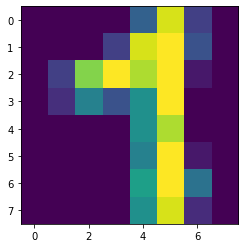

8
[0.         0.         0.0625     0.5        0.9375     0.6875
 0.1875     0.         0.         0.         0.6875     0.75
 0.5625     0.875      0.6875     0.         0.         0.125
 0.875      0.         0.         0.8125     0.375      0.
 0.         0.46666667 0.9375     0.5        0.75       0.5625
 0.         0.         0.         0.         0.375      0.8125
 1.         0.5        0.         0.         0.         0.
 0.         0.8125     0.5625     0.9375     0.25       0.
 0.         0.         0.         1.         0.5        0.875
 0.1875     0.         0.         0.         0.         0.6875
 0.9375     0.5        0.         0.        ]


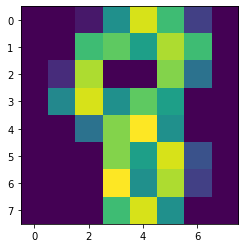

4
[0.         0.         0.         0.5        0.9375     0.
 0.         0.         0.         0.         0.3125     1.
 0.375      0.         0.         0.         0.         0.0625
 0.875      0.625      0.         0.4375     0.4375     0.
 0.         0.33333333 1.         0.1875     0.0625     1.
 0.46666667 0.         0.         0.57142857 1.         0.6875
 0.8125     1.         0.21428571 0.         0.         0.0625
 0.6875     0.9375     1.         0.8125     0.1875     0.
 0.         0.         0.         0.4375     1.         0.0625
 0.         0.         0.         0.         0.         0.75
 0.625      0.         0.         0.        ]


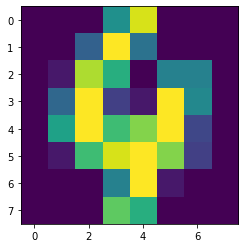

5
[0.         0.125      0.9375     1.         1.         1.
 0.3125     0.         0.         0.4375     1.         1.
 0.75       0.5625     0.0625     0.         0.         0.8125
 1.         0.1875     0.         0.         0.         0.
 0.         0.33333333 1.         0.6875     0.         0.
 0.         0.         0.         0.         0.625      1.
 0.375      0.         0.         0.         0.         0.
 0.0625     0.9375     0.6875     0.         0.         0.
 0.         0.0625     0.25       0.875      0.75       0.
 0.         0.         0.         0.33333333 0.9375     1.
 0.375      0.         0.         0.        ]


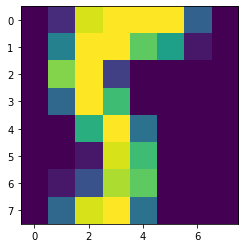

1
[0.     0.     0.     1.     0.6875 0.     0.     0.     0.     0.
 0.125  1.     1.     0.125  0.     0.     0.     0.     0.1875 1.
 1.     0.375  0.     0.     0.     0.     0.1875 1.     0.9375 0.125
 0.     0.     0.     0.     0.125  1.     1.     0.125  0.     0.
 0.     0.     0.25   1.     0.9375 0.     0.     0.     0.     0.
 0.0625 1.     0.9375 0.0625 0.     0.     0.     0.     0.     0.75
 1.     0.125  0.     0.    ]


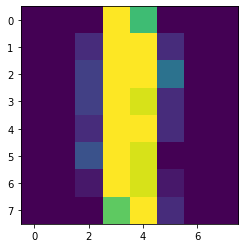

6
[0.         0.         0.         0.6875     0.875      0.
 0.         0.         0.         0.         0.625      1.
 0.25       0.         0.         0.         0.         0.0625
 0.9375     0.6875     0.         0.         0.         0.
 0.         0.2        1.         0.75       0.5        0.125
 0.         0.         0.         0.5        1.         1.
 0.75       0.875      0.21428571 0.         0.         0.25
 1.         0.5        0.         0.625      0.5625     0.
 0.         0.0625     0.75       0.9375     0.5625     0.875
 0.625      0.         0.         0.         0.125      0.625
 0.8125     0.6875     0.0625     0.        ]


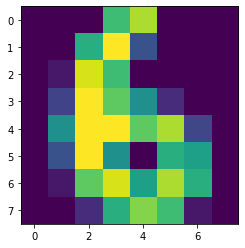

8
[0.     0.     0.375  0.75   0.8125 0.4375 0.     0.     0.     0.
 1.     0.625  1.     0.75   0.     0.     0.     0.     0.8125 0.4375
 1.     0.5625 0.     0.     0.     0.     0.0625 0.9375 0.8125 0.
 0.     0.     0.     0.     0.125  1.     0.8125 0.     0.     0.
 0.     0.     0.625  0.4375 0.625  0.125  0.     0.     0.     0.
 0.8125 0.25   0.8125 0.1875 0.     0.     0.     0.     0.4375 0.9375
 0.5625 0.     0.     0.    ]


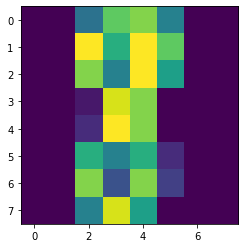

4
[0.         0.         0.         0.1875     0.9375     0.4375
 0.         0.         0.         0.         0.         0.8125
 0.875      0.1875     0.         0.         0.         0.
 0.375      0.9375     0.125      0.375      0.375      0.
 0.         0.13333333 0.9375     0.25       0.         0.9375
 0.53333333 0.         0.         0.57142857 0.75       0.
 0.25       1.         0.07142857 0.         0.         0.6875
 0.875      0.75       1.         0.625      0.         0.
 0.         0.125      0.5        0.4375     0.9375     0.25
 0.         0.         0.         0.         0.         0.1875
 1.         0.125      0.         0.        ]


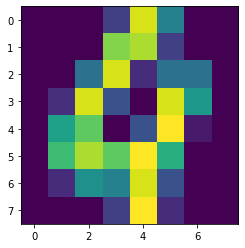

5
[0.         0.         0.3125     0.5        0.75       1.
 0.25       0.         0.         0.1875     1.         0.6875
 0.4375     0.0625     0.         0.         0.         0.1875
 0.875      0.375      0.25       0.         0.         0.
 0.         0.33333333 1.         0.75       0.875      0.375
 0.         0.         0.         0.         0.125      0.
 0.25       0.75       0.         0.         0.         0.
 0.         0.         0.25       0.625      0.         0.
 0.         0.         0.375      0.5        0.875      0.4375
 0.         0.         0.         0.         0.4375     0.8125
 0.4375     0.         0.         0.        ]


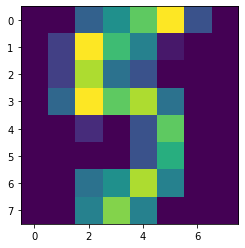

6
[0.     0.     0.     0.75   0.8125 0.     0.     0.     0.     0.
 0.3125 1.     0.5    0.     0.     0.     0.     0.     0.8125 1.
 0.1875 0.     0.     0.     0.     0.     0.875  0.8125 0.     0.
 0.     0.     0.     0.     0.9375 0.75   0.4375 0.125  0.     0.
 0.     0.     0.8125 1.     0.8125 1.     0.1875 0.     0.     0.
 0.4375 1.     0.6875 0.9375 0.5    0.     0.     0.     0.0625 0.5625
 0.9375 0.6875 0.1875 0.    ]


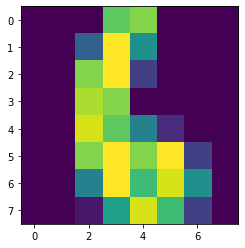

7
[0.         0.         0.125      0.625      0.625      0.75
 0.9375     0.66666667 0.         0.         0.5625     1.
 0.75       0.5        0.9375     0.5        0.         0.
 0.8125     0.5625     0.         0.25       0.75       0.125
 0.         0.06666667 1.         0.1875     0.0625     0.8125
 0.13333333 0.         0.         0.         0.3125     0.
 0.5625     0.4375     0.         0.         0.         0.
 0.         0.1875     0.8125     0.0625     0.         0.
 0.         0.         0.         0.75       0.4375     0.
 0.         0.         0.         0.         0.         0.875
 0.125      0.         0.         0.        ]


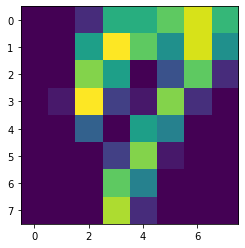

6
[0.         0.         0.0625     0.8125     0.4375     0.
 0.         0.         0.         0.         0.4375     0.875
 0.125      0.         0.         0.         0.         0.
 0.8125     0.3125     0.         0.         0.         0.
 0.         0.         1.         0.1875     0.         0.
 0.         0.         0.         0.21428571 1.         0.625
 0.75       0.75       0.21428571 0.         0.         0.1875
 1.         0.6875     0.3125     0.5625     0.75       0.
 0.         0.0625     0.8125     0.6875     0.25       0.8125
 0.6875     0.         0.         0.         0.0625     0.75
 1.         0.6875     0.125      0.        ]


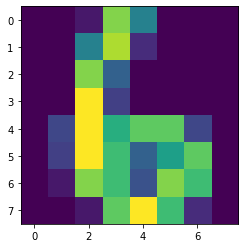

7
[0.     0.     0.625  1.     0.875  0.0625 0.     0.     0.     0.
 0.875  1.     1.     0.4375 0.     0.     0.     0.     0.0625 0.3125
 1.     0.4375 0.     0.     0.     0.     0.125  0.625  1.     0.6875
 0.4    0.     0.     0.5    1.     1.     0.9375 0.75   0.5    0.
 0.     0.6875 0.625  0.9375 0.625  0.     0.     0.     0.     0.
 0.375  1.     0.125  0.     0.     0.     0.     0.     0.8125 0.5625
 0.     0.     0.     0.    ]


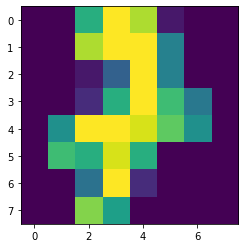

9
[0.         0.         0.25       0.8125     0.8125     0.25
 0.         0.         0.         0.         1.         0.625
 0.625      0.5        0.         0.         0.         0.
 0.875      0.4375     0.375      0.6875     0.         0.
 0.         0.         0.375      0.9375     0.9375     1.
 0.13333333 0.         0.         0.         0.         0.
 0.         0.6875     0.35714286 0.         0.         0.
 0.         0.         0.         0.4375     0.5625     0.
 0.         0.0625     0.25       0.25       0.375      0.75
 0.625      0.         0.         0.11111111 0.375      0.6875
 0.9375     0.75       0.0625     0.        ]


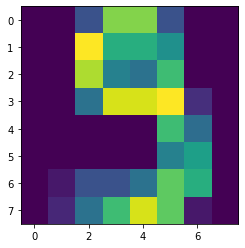

2
[0.         0.         0.         0.25       0.9375     0.75
 0.         0.         0.         0.         0.1875     1.
 0.9375     0.875      0.         0.         0.         0.
 0.5        0.8125     0.5        1.         0.         0.
 0.         0.         0.0625     0.375      0.9375     0.6875
 0.         0.         0.         0.07142857 0.5        0.8125
 0.9375     0.0625     0.         0.         0.         0.5625
 1.         1.         0.3125     0.         0.         0.
 0.         0.1875     0.8125     1.         1.         0.6875
 0.3125     0.         0.         0.         0.         0.1875
 0.6875     1.         0.5625     0.        ]


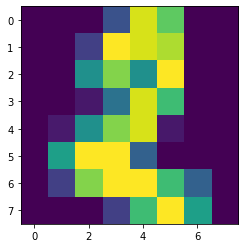

7
[0.         0.         0.         0.6875     1.         1.
 0.625      0.         0.         0.         0.625      0.75
 0.5625     0.9375     0.5625     0.         0.         0.
 0.8125     0.5        0.         0.75       0.3125     0.
 0.         0.         0.375      0.         0.25       0.75
 0.         0.         0.         0.         0.125      0.9375
 1.         1.         0.64285714 0.         0.         0.
 0.375      0.8125     0.9375     0.5625     0.0625     0.
 0.         0.         0.         0.5625     0.5625     0.
 0.         0.         0.         0.         0.0625     0.875
 0.25       0.         0.         0.        ]


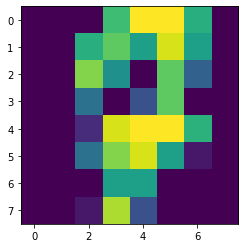

3
[0.         0.         0.625      1.         0.625      0.0625
 0.         0.         0.         0.375      0.875      0.375
 1.         0.1875     0.         0.         0.         0.3125
 0.25       0.3125     0.9375     0.         0.         0.
 0.         0.         0.         0.75       0.875      0.0625
 0.         0.         0.         0.         0.         0.1875
 0.6875     0.9375     0.07142857 0.         0.         0.
 0.         0.         0.         0.625      0.5        0.
 0.         0.         0.5625     0.5        0.5        0.9375
 0.375      0.         0.         0.         0.5625     0.9375
 0.9375     0.5625     0.         0.        ]


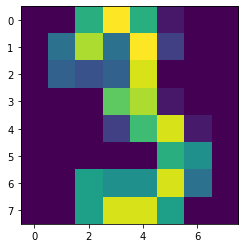

4
[0.         0.         0.         0.25       0.75       0.
 0.         0.         0.         0.         0.         0.75
 1.         0.5        0.         0.         0.         0.
 0.25       1.         0.9375     0.5        0.         0.
 0.         0.06666667 0.9375     0.5        0.875      0.4375
 0.         0.         0.         0.42857143 1.         0.5
 0.875      0.875      0.28571429 0.         0.         0.625
 1.         1.         1.         0.8125     0.0625     0.
 0.         0.         0.         0.125      1.         0.25
 0.         0.         0.         0.         0.         0.25
 0.8125     0.125      0.         0.        ]


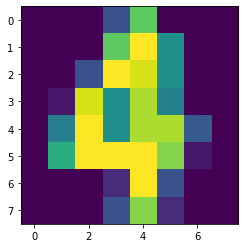

8
[0.     0.     0.25   0.6875 0.9375 0.125  0.     0.     0.     0.125
 1.     0.5625 0.5    0.5625 0.     0.     0.     0.25   0.9375 0.
 0.3125 1.     0.1875 0.     0.     0.     0.6875 0.6875 1.     0.5625
 0.     0.     0.     0.     0.25   1.     0.9375 0.0625 0.     0.
 0.     0.     0.8125 0.5625 0.375  0.75   0.0625 0.     0.     0.
 0.9375 0.1875 0.     0.5625 0.3125 0.     0.     0.     0.3125 0.8125
 0.8125 0.75   0.3125 0.    ]


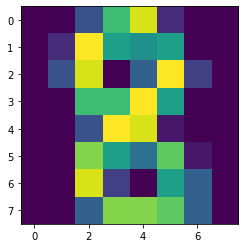

In [86]:
# visualizing the representative digits
for i in range(0,50):
    plt.imshow(X_representative_digits[i].reshape((8, 8)))
    print(y_representative_digits[i])
    print(X_representative_digits[i])
    plt.show()


In [77]:
def Pro_model(X, y, y_pro):
    estimator_SVM = SVC()

    parameters_SVM = {
        "C": [0.5, 1, 3, 5, 11, 20],
        "gamma": (0.1, 10.0, 1.0, 3),
        "kernel": ("linear", "rbf"),
    }

    # with GridSearch
    grid_search_SVM = GridSearchCV(
        estimator=estimator_SVM,
        param_grid=parameters_SVM,
        scoring="accuracy",
        n_jobs=-1,
        return_train_score=True,
        cv=5,
        verbose=3,
    )
    # fit the SVM model

    Pro_model = grid_search_SVM.fit(X, y_pro)

    # predicting on training and test data-set
    Y_pred = Pro_model.predict(X)

    # Assess the performance
    print("SVM : ")
    print(grid_search_SVM.best_params_)
    print("Averange Accuracy Scores - SVM:", metrics.accuracy_score(y, Y_pred))
    # print("Precision score - SVM: ", precision_score(y, Y_pred))
    # print("Recall score - SVM: ", recall_score(y, Y_pred))
    # print("F1 score - SVM: ", f1_score(y, Y_pred))
    print("Confusion matrix - SVM: \n", confusion_matrix(y, Y_pred))
    # tn, fp, fn, tp = confusion_matrix(y, Y_pred).ravel()
    # print("tn = ", tn, "fp = ", fp, "fn = ", fn, "tp = ", tp)
    return Pro_model


Pro_model = Pro_model(X_representative_digits, y_representative_digits, y_representative_digits)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\Python3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


SVM : 
{'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}
Averange Accuracy Scores - SVM: 1.0
Confusion matrix - SVM: 
 [[3 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 6 0 0]
 [0 0 0 0 0 0 0 0 4 0]
 [0 0 0 0 0 0 0 0 0 6]]


In [78]:
def Test(X, y, model):
    model.score(X, y)
    Y_pred = model.predict(X)

    # Assess the performance
    print("SVM : ")
    print(model.best_params_)
    print("Averange Accuracy Scores - SVM:", metrics.accuracy_score(y, Y_pred))
    # print("Precision score - SVM: ", precision_score(y, Y_pred))
    # print("Recall score - SVM: ", recall_score(y, Y_pred))
    # print("F1 score - SVM: ", f1_score(y, Y_pred))
    print("Confusion matrix - SVM: \n", confusion_matrix(y, Y_pred))
    # tn, fp, fn, tp = confusion_matrix(y, Y_pred).ravel()
    # print("tn = ", tn, "fp = ", fp, "fn = ", fn, "tp = ", tp)


Test(X_test, y_test, Pro_model)

SVM : 
{'C': 3, 'gamma': 0.1, 'kernel': 'rbf'}
Averange Accuracy Scores - SVM: 0.9333333333333333
Confusion matrix - SVM: 
 [[35  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  1 34  0  0  0  0  1  0  0]
 [ 0  0  1 31  0  1  0  0  3  1]
 [ 0  1  0  0 30  0  0  1  0  0]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  1]
 [ 0  8  1  0  0  0  0  0 28  1]
 [ 0  0  0  0  0  2  0  0  0 27]]


## Partial propagation


In [50]:
percentile_closest = 90

#create a list  with the minimum distances from the centroid of each item
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_] 

# for each representative images
for i in range(50):    
    in_cluster = kmeans.labels_ == i #Array of true value for each kmeans label
    cluster_dist = X_cluster_dist[in_cluster] # extract erray of distances of each labelled point from the centroid
    cutoff_distance = np.percentile(cluster_dist, percentile_closest) # for the label find the 20th percentile of the distances
    above_cutoff = X_cluster_dist > cutoff_distance # array of TRUE for items above the 20th percetile
    X_cluster_dist[in_cluster & above_cutoff] = -1 # keep the items below the 20th percentile for each label

partially_propagated = X_cluster_dist != -1 # keep the items below the 20th percentile for whole distribution
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [51]:

sum(partially_propagated)



1274

In [62]:
def Par_Pro_Model(X, y):
    estimator_SVM = SVC(probability=True)

    parameters_SVM = {
        "C": [0.001, 0.1, 0.5, 1, 3, 5, 11, 20],
        "gamma": (0.01, 0.1, 0.5, 1.0, 3),
        "kernel": ("linear", "rbf"),
        
    }

    # with GridSearch
    grid_search_SVM = GridSearchCV(
        estimator=estimator_SVM,
        param_grid=parameters_SVM,
        scoring="accuracy",
        n_jobs=-1,
        return_train_score=True,
        cv=5,
        verbose=3,
        
    )
    # fit the SVM model

    model = grid_search_SVM.fit(X, y)

    # predicting on training and test data-set
    Y_pred = model.predict(X)

    # Assess the performance
    print("SVM : ")
    print(grid_search_SVM.best_params_)
    print("Averange Accuracy Scores - SVM:", metrics.accuracy_score(y, Y_pred))
    # print("Precision score - SVM: ", precision_score(y, Y_pred))
    # print("Recall score - SVM: ", recall_score(y, Y_pred))
    # print("F1 score - SVM: ", f1_score(y, Y_pred))
    print("Confusion matrix - SVM: \n", confusion_matrix(y, Y_pred))
    # tn, fp, fn, tp = confusion_matrix(y, Y_pred).ravel()
    # print("tn = ", tn, "fp = ", fp, "fn = ", fn, "tp = ", tp)

    return model


Par_Pro_Model = Par_Pro_Model(    X_train_partially_propagated, y_train_partially_propagated)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
SVM : 
{'C': 3, 'gamma': 0.5, 'kernel': 'rbf'}
Averange Accuracy Scores - SVM: 1.0
Confusion matrix - SVM: 
 [[126   0   0   0   0   0   0   0   0   0]
 [  0 137   0   0   0   0   0   0   0   0]
 [  0   0 136   0   0   0   0   0   0   0]
 [  0   0   0 118   0   0   0   0   0   0]
 [  0   0   0   0 128   0   0   0   0   0]
 [  0   0   0   0   0 120   0   0   0   0]
 [  0   0   0   0   0   0 136   0   0   0]
 [  0   0   0   0   0   0   0 123   0   0]
 [  0   0   0   0   0   0   0   0 111   0]
 [  0   0   0   0   0   0   0   0   0 139]]


In [53]:
def Test(X, y, model):
    model.score(X, y)
    Y_pred = model.predict(X)

    # Assess the performance
    print("SVM : ")
    print(model.best_params_)
    print("Averange Accuracy Scores - SVM:", metrics.accuracy_score(y, Y_pred))
    # print("Precision score - SVM: ", precision_score(y, Y_pred))
    # print("Recall score - SVM: ", recall_score(y, Y_pred))
    # print("F1 score - SVM: ", f1_score(y, Y_pred))
    print("Confusion matrix - SVM: \n", confusion_matrix(y, Y_pred))
    # tn, fp, fn, tp = confusion_matrix(y, Y_pred).ravel()
    # print("tn = ", tn, "fp = ", fp, "fn = ", fn, "tp = ", tp)


Test(X_test, y_test, Par_Pro_Model)

SVM : 
{'C': 3, 'gamma': 0.5, 'kernel': 'rbf'}
Averange Accuracy Scores - SVM: 0.9583333333333334
Confusion matrix - SVM: 
 [[35  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  1  0  0]
 [ 0  0  0 33  0  1  0  0  2  1]
 [ 0  0  0  0 31  0  0  0  0  1]
 [ 0  0  0  0  0 45  0  0  0  1]
 [ 0  0  0  0  0  0 29  0  1  0]
 [ 0  0  0  0  0  0  0 41  0  1]
 [ 0  2  3  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  1  0  0  0 28]]


## New Items to predict

Prediction with full model:  [1]
Prediction with semi-supervised model:  [1]
Prediction with semi-supervised model (90%):  [1]


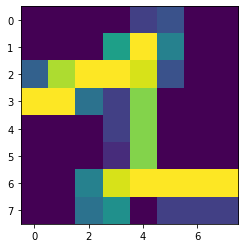

In [169]:
import matplotlib.image as mpimg
from sklearn.preprocessing import KBinsDiscretizer
from PIL import Image
import cv2
import PIL

def recognize(N, model1, model2, model3):

    n = Image.open(N).resize((8,8))
    n = n.convert('L')
    n = np.array(n)
    
    est = KBinsDiscretizer(n_bins=17, encode='ordinal', strategy='uniform')
    est.fit(n)
    n = est.transform(n)
    n=(abs(n-16))

    scaler = MinMaxScaler(feature_range=(0, 1))
    n= scaler.fit_transform(n)
    plt.imshow(n)
    
    
    n = n.reshape(1, 64)
    n_pred = model1.predict(n)
    print("Prediction with full model: ",n_pred)
    one_pred = model2.predict(n)
    print("Prediction with semi-supervised model: ",n_pred)
    one_pred = model3.predict(n)
    print("Prediction with semi-supervised model (90%): ",n_pred)
    
recognize('1.PNG', FullModel,Pro_model, Par_Pro_Model)
